In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pycoco as pcc
import pyCoCo as pccsim
from astropy.table import vstack

fltPath = pcc.utils.b(pcc.defaults._default_filter_dir_path)
rootPath = pcc.utils.b(pcc.defaults._default_coco_dir_path)
coco = pccsim.pyCoCo(fltPath, rootPath)

import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo

In [2]:
info = pcc.classes.InfoClass()
info.load()

df = pd.DataFrame({'snname': info.snname, 
                   'model': 'Bazin09', 
                   'rerun_lc': True, 
                   'rerun_spec': True})

mjdmax = 50                    
absmag_offset = 0.0
EBV_MW = 0.0
EBV_host = 0.0
R_v = 3.1

mjd_obs = np.arange(0.,105.,1.)
filters = ["DES_g", "DES_r", "DES_i", "DES_z"]

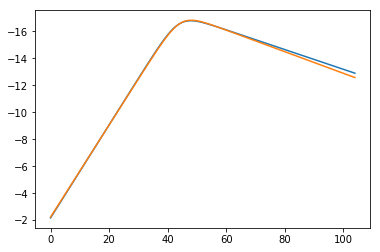

In [3]:
zp_dict = {}
for flt in filters:
    zp_dict[flt] = pcc.kcorr.calc_AB_zp(flt)

filter_obs = np.array([pcc.utils.b('DES_g') for observation in mjd_obs])
flux, flux_err = coco.simulate(pcc.utils.b('SN1993J'),
                               0.1, 
                               absmag_offset, 
                               EBV_MW, EBV_host, R_v,
                               mjdmax, mjd_obs,
                               filter_obs)

distmod = cosmo.distmod(0.1).value
g = -2.5*np.log10(flux) - zp_dict['DES_g'] - distmod
plt.plot(mjd_obs, g)

filter_obs = np.array([pcc.utils.b('DES_i') for observation in mjd_obs])
flux, flux_err = coco.simulate(pcc.utils.b('SN1993J'),
                               0.8, 
                               absmag_offset, 
                               EBV_MW, EBV_host, R_v,
                               mjdmax, mjd_obs,
                               filter_obs)

distmod = cosmo.distmod(0.8).value
i = -2.5*np.log10(flux) - zp_dict['DES_i'] - distmod
plt.plot(mjd_obs, i)

plt.gca().invert_yaxis()

In [4]:
g.min()

-16.797763939977525

In [5]:
i.min()

-16.832033945620058

In [8]:
10**(0.4*(g.min() - i.min()))

1.0320672623711866